# Pymaceuticals Inc.
---

### Analysis

- 1.	The tumor in mouse l509 has a volume that reaches its peak size around timepoint 20 and decreases until timepoint 35. At 35, it appears to increase again. 
2.	The average mouse weight and the average observed tumor volume for the entire Capomulin regimen have a positive correlation.
3.	There is a slightly larger male population of mice tested with 51% being male and the other 49% being female. 

 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [20]:
# Checking the number of mice.
num_unique_mice = merged_df['Mouse ID'].nunique()
print("Total unique mice IDs:", num_unique_mice)

Total unique mice IDs: 249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print("Duplicate Mouse IDs (time point):", duplicate_mouse_ids)

Duplicate Mouse IDs (time point): ['g989']


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)]
print("Duplicate mouse IDs data:")
print(duplicate_mouse_data)

Duplicate mouse IDs data:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female     

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

In [18]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_df['Mouse ID'].nunique()
print("Total Mice in the cleaned DataFrame:", num_mice_cleaned)

Total Mice in the cleaned DataFrame: 248


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#SAME AS TABLE ABOVE JUST FORMATTED NICER
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
styled_summary_stats = summary_stats.style.format({
    'mean': '{:.2f}',
    'median': '{:.2f}',
    'var': '{:.2f}',
    'std': '{:.2f}',
    'sem': '{:.2f}'
})
display(styled_summary_stats)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

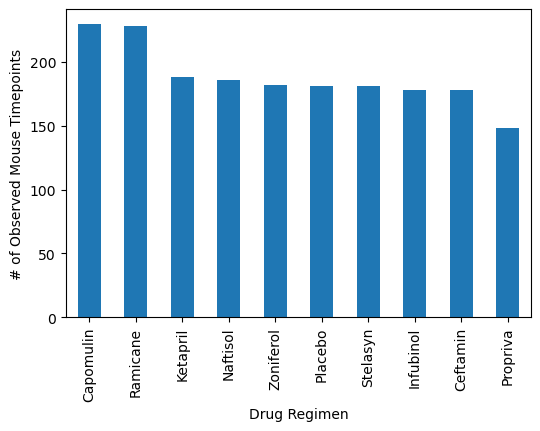

In [250]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

regimen_counts.plot(kind='bar', figsize=(6,4), alpha=1)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


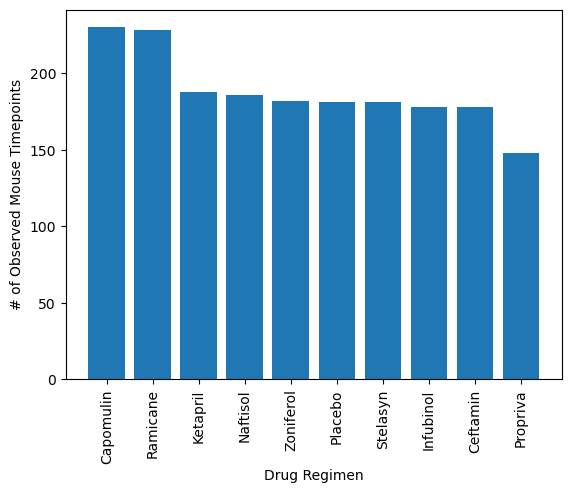

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

x_positions = regimen_counts.index
y_positions = regimen_counts.values

plt.bar(x_positions, y_positions, alpha=1)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.show()

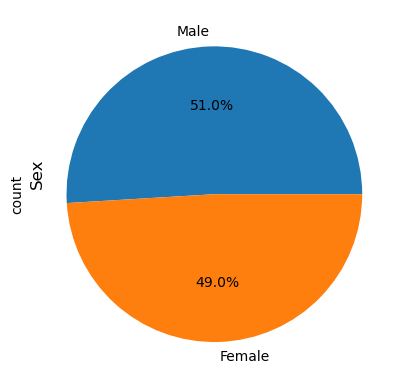

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = cleaned_df['Sex'].value_counts()

sex_distribution.plot(kind='pie', autopct='%1.1f%%')

plt.title('Sex',loc='left', rotation=90, y=.5)

plt.show()

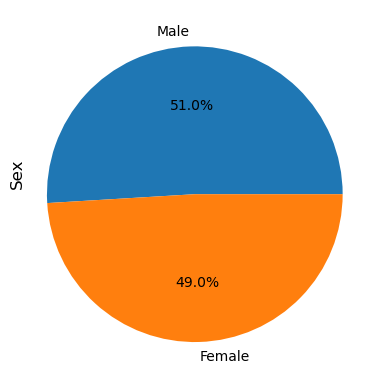

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = cleaned_df['Sex'].value_counts()
label = sex_distribution.index
size = sex_distribution.values

plt.pie(size, labels=label, autopct='%1.1f%%')

plt.title('Sex',loc='left', rotation=90 ,y=.5)

plt.show()

## Quartiles, Outliers and Boxplots

In [268]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
further_study = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
further_study = cleaned_df[cleaned_df['Drug Regimen'].isin(further_study)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = further_study.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how="left") 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [296]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    regimen_data = last_timepoint[last_timepoint['Drug Regimen'] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(regimen_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = regimen_data.quantile([0.25, .5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]

    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    # Determine outliers using upper and lower bounds
outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

print(quartiles)
print(lower_q)
print(upper_q)
print(iqr)
print(lower_bound)
print(upper_bound)
print(outliers)

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
48.72207785
64.29983003
15.577752179999997
25.355449580000002
87.66645829999999
Series([], Name: Tumor Volume (mm3), dtype: float64)


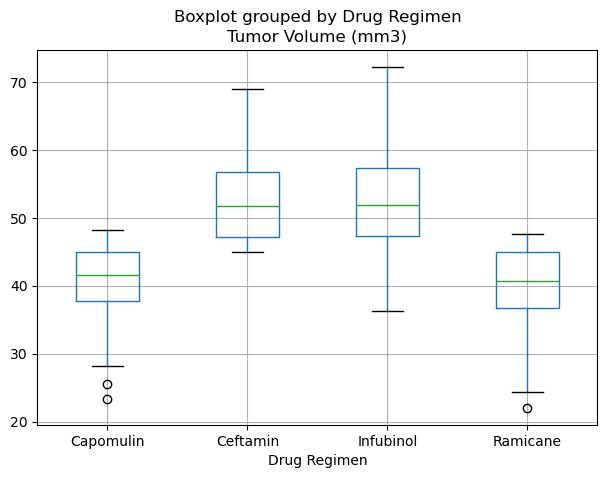

In [310]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
CRIC_drugs_df = cleaned_df[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
boxplot = CRIC_drugs_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(7, 5))


## Line and Scatter Plots

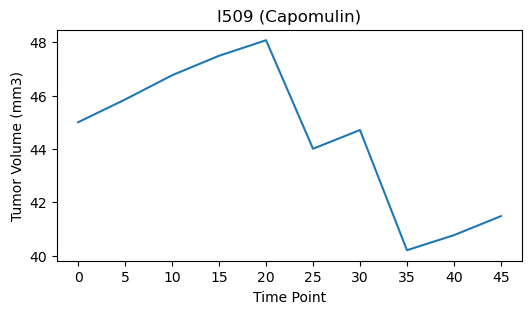

In [162]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == mouse_id)]

plt.figure(figsize=(6, 3))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.grid(False)

plt.title(f"{mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.xticks(mouse_data['Timepoint'])  

plt.show()

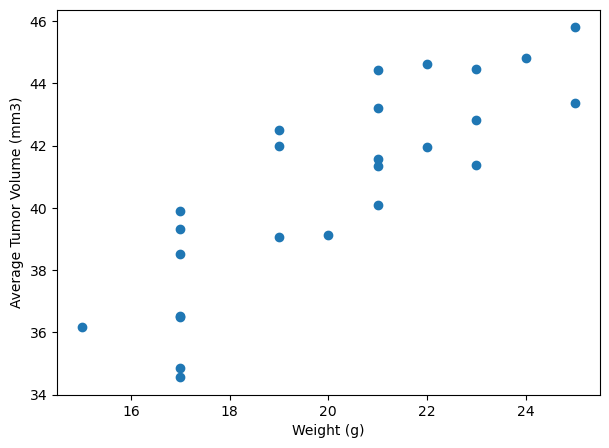

In [225]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'})

average_tumor_volume = average_data['Tumor Volume (mm3)']
mouse_weight = average_data['Weight (g)']

plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(False)

plt.show()

## Correlation and Regression

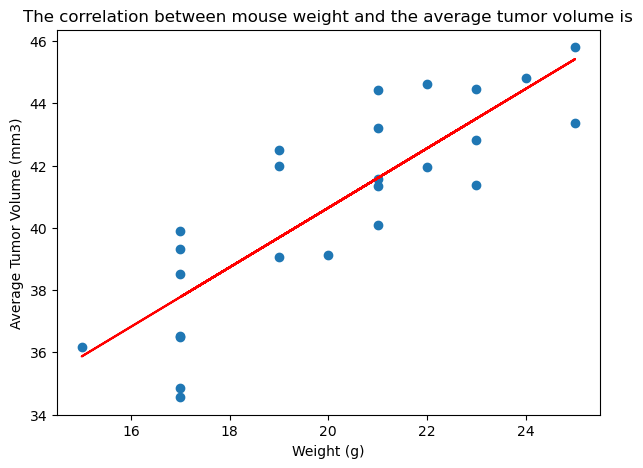

In [227]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight, average_tumor_volume)
plt.title("The correlation between mouse weight and the average tumor volume is")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(False)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r')

plt.show()